### 思路，因为叶片中心通常被遮挡住，显得很黑。

### 我们先用轮廓分割，然后再用颜色分割。

https://blog.csdn.net/loovelj/article/details/78739790

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [10]:
image = cv2.imread("dujuan_1.jpg", cv2.IMREAD_GRAYSCALE)

connecivity = 8
rt, image = cv2.threshold(image, -1, 1, cv2.THRESH_OTSU, cv2.THRESH_BINARY)#为什么是-1  ？？？
num, labelmap = cv2.connectedComponents(image, connecivity, cv2.CV_32S)

image = np.hstack((image, labelmap.astype(np.float32)/(num - 1)))

cv2.connectedComponents（）

函数各参数意义：

num_objects, labels = cv2.connectedComponents(image)

参数介绍如下：

image：也就是输入图像，必须是二值图，即8位单通道图像。（因此输入图像必须先进行二值化处理才能被这个函数接受）

返回值：

num_labels：所有连通域的数目

labels：图像上每一像素的标记，用数字1、2、3…表示（不同的数字表示不同的连通域）

np.hstack将参数元组的元素数组按水平方向进行叠加

In [ ]:
cv2.imshow("comp", image)#显示第一幅图
cv2.waitKey()
cv2.destroyAllWindows()

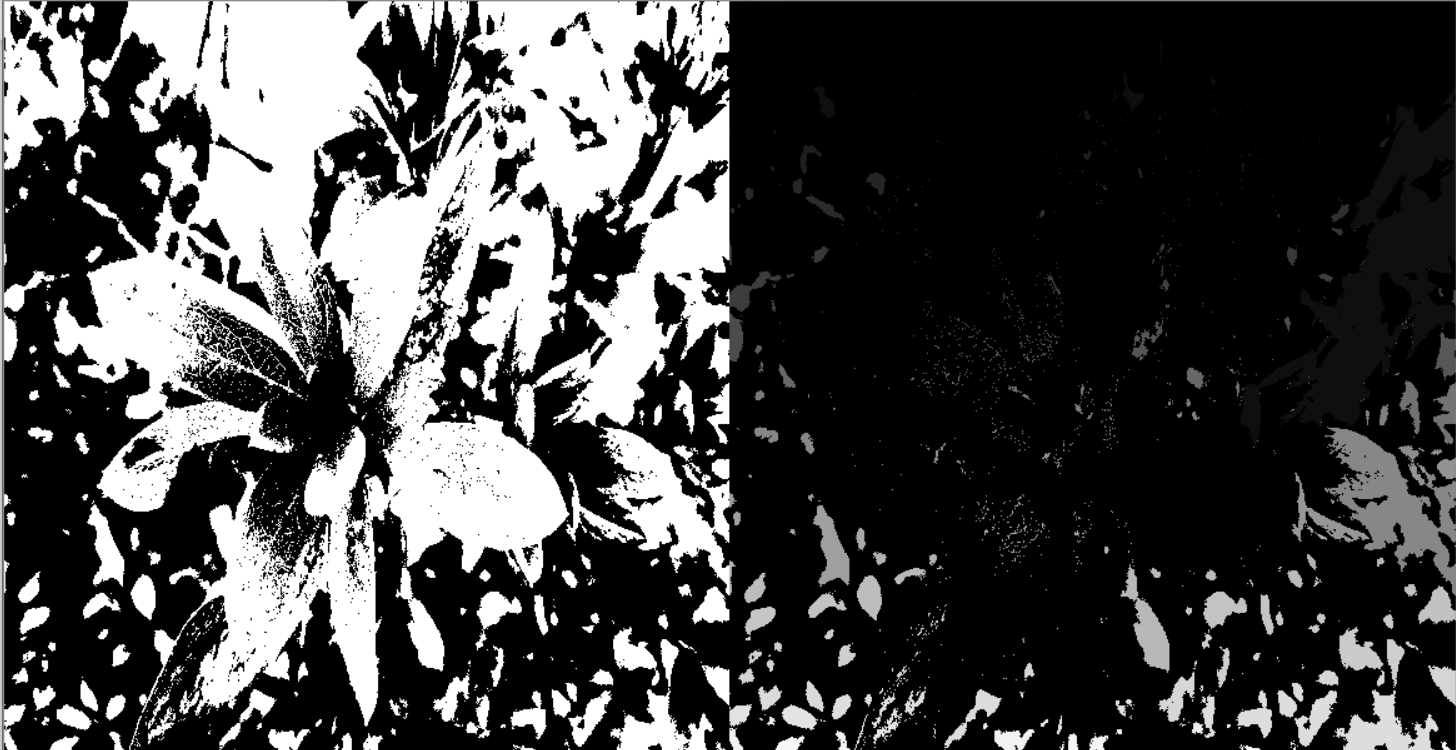

In [49]:
image = cv2.imread("dujuan_1.jpg", cv2.IMREAD_GRAYSCALE)

rt, otsu = cv2.threshold(image, -1, 1, cv2.THRESH_OTSU, cv2.THRESH_BINARY)
output = cv2.connectedComponentsWithStats(otsu, connecivity, cv2.CV_32S)

num, labelmap, stats, center = output

cv2.connectedComponentsWithStats（）

这个函数的作用是对一幅图像进行连通域提取，并返回找到的连通域的信息：retval、labels、stats、centroids

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(image, connectivity=8, ltype=None)

参数介绍如下：

image：也就是输入图像，必须是二值图，即8位单通道图像。（因此输入图像必须先进行二值化处理才能被这个函数接受）

connectivity：可选值为4或8，也就是使用4连通还是8连通。

ltype：输出图像标记的类型，目前支持CV_32S 和 CV_16U。 

返回值：

num_labels：所有连通域的数目

labels：图像上每一像素的标记，用数字1、2、3…表示（不同的数字表示不同的连通域）

stats：每一个标记的统计信息，是一个5列的矩阵，每一行对应每个连通区域的外接矩形的x、y、width、height和面积，示例如下： 0 0 720 720 291805

centroids：连通域的中心点

In [16]:
colored = np.full((image.shape[0], image.shape[1], 3), 0, np.uint8)

for i in range(1, num):
    if stats[i][4] > 200:
        colored[labelmap == i] = (0, 255 * i/num, 255 * num / i)
        cv2.circle(colored, (int(center[i][0]), int(center[i][1])), 5, (255, 0, 0), cv2.FILLED)

image = cv2.cvtColor(otsu * 255, cv2.COLOR_GRAY2BGR)

numpy.full

numpy.full(shape, fill_value, dtype=None, order='C')

返回一个根据指定shape和type,并用fill_value填充的新数组。



In [17]:
print(stats)

[[      0       0    4608    3456 8088077]
 [      0       0     531     780  240960]
 [    312       0    4296    3339 5537379]
 ...
 [   3601    3455       1       1       1]
 [   4112    3455       1       1       1]
 [   4283    3454       4       2       5]]


In [29]:
print(type(stats))

<class 'numpy.ndarray'>


In [20]:
print(type(stats.shape))
print(stats.shape)

<class 'tuple'>
(12055, 5)


In [21]:
print(num)

12055


In [22]:
print(center)

[[2150.0079386  1988.57384703]
 [ 229.018916    370.70681441]
 [2272.45901048 1282.22898577]
 ...
 [3601.         3455.        ]
 [4112.         3455.        ]
 [4284.2        3454.8       ]]


In [24]:
print(center.shape)

(12055, 2)


In [25]:
print(colored)

[[[  0   0 233]
  [  0   0 233]
  [  0   0 233]
  ...
  [  0   0 244]
  [  0   0 244]
  [  0   0 244]]

 [[  0   0 233]
  [  0   0 233]
  [  0   0 233]
  ...
  [  0   0 244]
  [  0   0 244]
  [  0   0 244]]

 [[  0   0 233]
  [  0   0 233]
  [  0   0 233]
  ...
  [  0   0 244]
  [  0   0 244]
  [  0   0 244]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


In [ ]:
cv2.imshow('con', np.hstack((image, colored)))

cv2.waitKey()
cv2.destroyAllWindows()

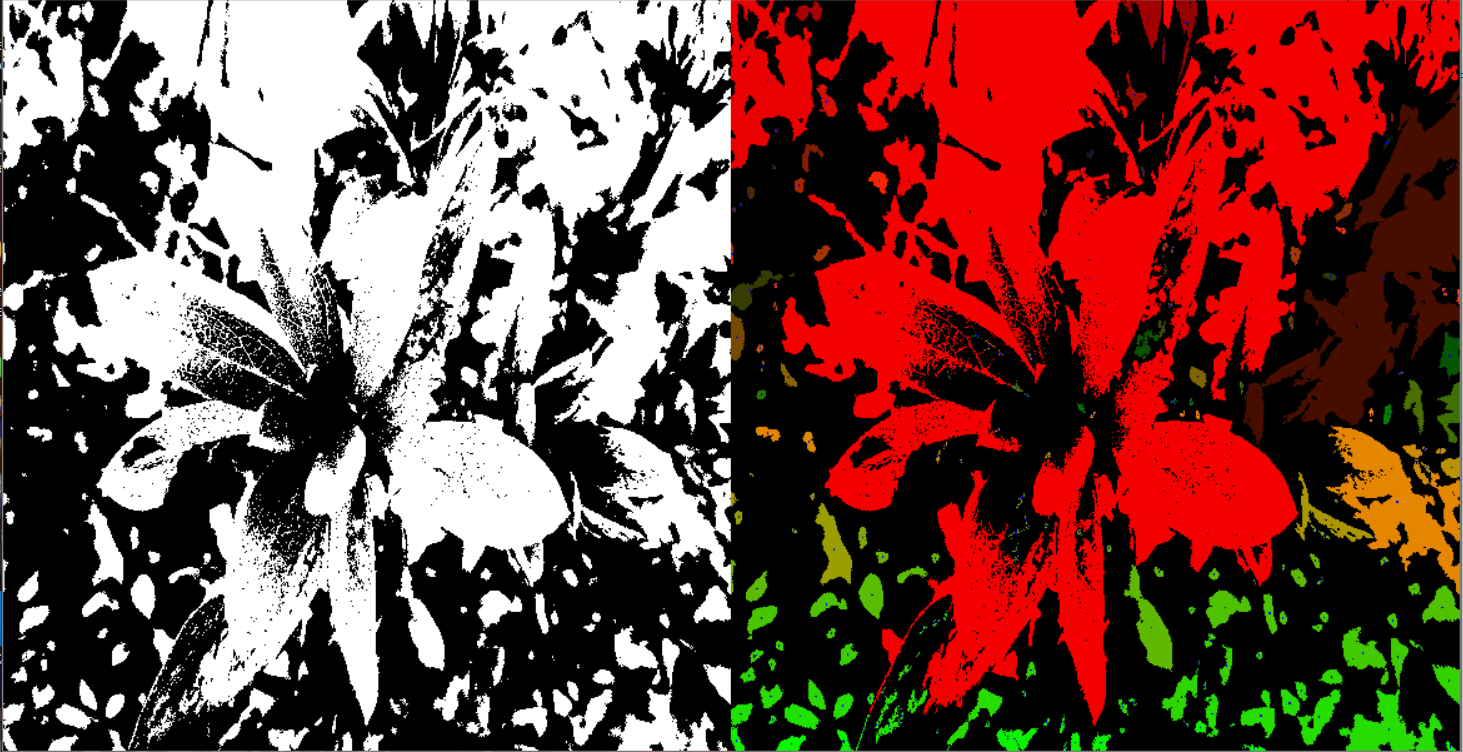

https://blog.csdn.net/qq_40784418/article/details/106023288

OpenCV自学记录（6）——python实现连通域处理函数cv2.connectedComponentsWithStats（）和cv2.connectedComponents（）

In [ ]:
import cv2
import numpy as np

# 读入图片
img = cv2.imread("dujuan_1.jpg")
# 中值滤波，去噪
img = cv2.medianBlur(img, 3)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.namedWindow('original', cv2.WINDOW_AUTOSIZE)
cv2.imshow('original', gray)

# 阈值分割得到二值化图片
ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 膨胀操作
kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
bin_clo = cv2.dilate(binary, kernel2, iterations=2)

# 连通域分析
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(bin_clo, connectivity=8)

# 查看各个返回值
# 连通域数量
print('num_labels = ',num_labels)
# 连通域的信息：对应各个轮廓的x、y、width、height和面积
print('stats = ',stats)
# 连通域的中心点
print('centroids = ',centroids)
# 每一个像素的标签1、2、3.。。，同一个连通域的标签是一致的
print('labels = ',labels)

# 不同的连通域赋予不同的颜色
output = np.zeros((img.shape[0], img.shape[1], 3), np.uint8)
for i in range(1, num_labels):

    mask = labels == i
    output[:, :, 0][mask] = np.random.randint(0, 255)
    output[:, :, 1][mask] = np.random.randint(0, 255)
    output[:, :, 2][mask] = np.random.randint(0, 255)
cv2.imshow('oginal', output)
cv2.waitKey()
cv2.destroyAllWindows()
